In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scr.visualization import visulize_lineplot
from scr.contruct_dataset import construct_dataset
from scr.regression_analysis import did_regression, formart_result

In [9]:
DATA_PATH = "./Datasets/Marketing Campaign Dataset.csv"
df = pd.read_csv(DATA_PATH)
df['Date'] = pd.to_datetime(df['Date'])
display(df)

,Store_ID,Date,Month Index,Store Size,Marketing Strategy,Average Order Values (Tsh),Post Campaign Period,Sales Revenue (Tsh)
0,1,2023-01-01,1,Small,Pilot Launch Regions,31398,0,1.038102e+06
1,1,2023-02-01,2,Small,Pilot Launch Regions,31398,0,8.595213e+05
2,1,2023-03-01,3,Small,Pilot Launch Regions,31398,0,9.214244e+05
3,1,2023-04-01,4,Small,Pilot Launch Regions,31398,0,8.997629e+05
4,1,2023-05-01,5,Small,Pilot Launch Regions,31398,0,1.072439e+06
...,...,...,...,...,...,...,...,...
2995,100,2025-02-01,26,Medium,Business-as-Usual (BAU) Regions,37190,1,1.594221e+06
2996,100,2025-03-01,27,Medium,Business-as-Usual (BAU) Regions,37190,1,1.330849e+06
2997,100,2025-04-01,28,Medium,Business-as-Usual (BAU) Regions,37190,1,1.535029e+06
2998,100,2025-05-01,29,Medium,Business-as-Usual (BAU) Regions,37190,1,1.601263e+06


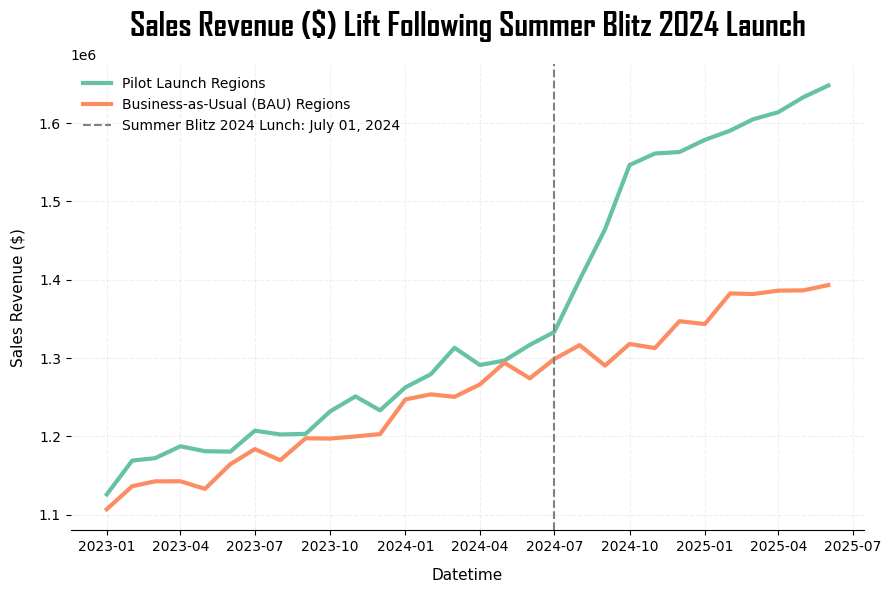

In [10]:
event_date = df['Date'].min() + pd.DateOffset(months=18)
title = "Sales Revenue ($) Lift Following Summer Blitz 2024 Launch"
visulize_lineplot(
    df = df, 
    date_col = 'Date', 
    value_col = 'Sales Revenue (Tsh)', 
    group_col = 'Marketing Strategy', 
    event_date = event_date, 
    title = title, 
    xlabel = 'Datetime',
    ylabel = 'Sales Revenue ($)',
    label = 'Summer Blitz 2024 Lunch'
)

In [11]:
df['is_campaign_group'] = (df['Marketing Strategy'] == 'Pilot Launch Regions').astype(int)
df = df.rename(columns={'Store Size': 'store_size', "Sales Revenue (Tsh)": 'sales_revenue', 'Post Campaign Period': 'post_campaign_period'})
display(df)

,Store_ID,Date,Month Index,store_size,Marketing Strategy,Average Order Values (Tsh),post_campaign_period,sales_revenue,is_campaign_group
0,1,2023-01-01,1,Small,Pilot Launch Regions,31398,0,1.038102e+06,1
1,1,2023-02-01,2,Small,Pilot Launch Regions,31398,0,8.595213e+05,1
2,1,2023-03-01,3,Small,Pilot Launch Regions,31398,0,9.214244e+05,1
3,1,2023-04-01,4,Small,Pilot Launch Regions,31398,0,8.997629e+05,1
4,1,2023-05-01,5,Small,Pilot Launch Regions,31398,0,1.072439e+06,1
...,...,...,...,...,...,...,...,...,...
2995,100,2025-02-01,26,Medium,Business-as-Usual (BAU) Regions,37190,1,1.594221e+06,0
2996,100,2025-03-01,27,Medium,Business-as-Usual (BAU) Regions,37190,1,1.330849e+06,0
2997,100,2025-04-01,28,Medium,Business-as-Usual (BAU) Regions,37190,1,1.535029e+06,0
2998,100,2025-05-01,29,Medium,Business-as-Usual (BAU) Regions,37190,1,1.601263e+06,0


In [12]:
formula = 'sales_revenue ~ is_campaign_group * post_campaign_period + C(store_size)'
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          sales_revenue   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     3905.
Date:                Sun, 10 Aug 2025   Prob (F-statistic):               0.00
Time:                        01:22:59   Log-Likelihood:                -38775.
No. Observations:                3000   AIC:                         7.756e+04
Df Residuals:                    2994   BIC:                         7.760e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [13]:
formart_result(model)

,Variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],Percent Effect (%),Percent Diff. (%)
0,Intercept,1653900.339,5970.570,277.009,0.0000,1642193.505,1665607.173,100.000000,100.00
1,C(store_size)[T.Medium],-362498.459,5779.297,-62.724,0.0000,-373830.253,-351166.665,-21.917793,-21.92
2,C(store_size)[T.Small],-655544.740,5815.038,-112.733,0.0000,-666946.614,-644142.866,-39.636290,-39.64
3,is_campaign_group,-23.751,4601.702,-0.005,0.9959,-9046.569,8999.067,-0.001436,-0.00
4,post_campaign_period,147539.222,5326.498,27.699,0.0000,137095.256,157983.188,8.920684,8.92
5,is_campaign_group:post_campaign_period,182966.047,7532.805,24.289,0.0000,168196.048,197736.045,11.062701,11.06


---

This analysis was performed by **Jabulente**, a passionate and dedicated data analyst with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via.  

----

<div align="center">  
    
[![GitHub](https://img.shields.io/badge/GitHub-Jabulente-black?logo=github)](https://github.com/Jabulente)  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Jabulente-blue?logo=linkedin)](https://linkedin.com/in/jabulente-208019349)  [![Email](https://img.shields.io/badge/Email-jabulente@hotmail.com-red?logo=gmail)](mailto:Jabulente@hotmail.com)  

</div>


<h1 style='font-size: 35px; color: red; font-family: Agency FB; font-weight: 700; text-align: center'>Data to Drive Meaningful Insights and Solutions</h1>